In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os 
print(os.listdir("/Users/mac/Desktop/kaggle/Frauddetection/ieee-fraud-detection"))

['test_transaction.csv', 'train_identity.csv', 'test_identity.csv', 'sample_submission.csv', 'train_transaction.csv']


In [3]:
train_transaction = pd.read_csv('/Users/mac/Desktop/kaggle/Frauddetection/ieee-fraud-detection/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('/Users/mac/Desktop/kaggle/Frauddetection/ieee-fraud-detection/test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('/Users/mac/Desktop/kaggle/Frauddetection/ieee-fraud-detection/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('/Users/mac/Desktop/kaggle/Frauddetection/ieee-fraud-detection/test_identity.csv', index_col='TransactionID')

sample_submission = pd.read_csv('/Users/mac/Desktop/kaggle/Frauddetection/ieee-fraud-detection/sample_submission.csv', index_col='TransactionID')

train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

In [5]:
def make_day_feature(df, offset=0, tname='TransactionDT'):
    days = df[tname] / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days

def make_hour_feature(df, tname='TransactionDT'):
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours


(0, 1000)

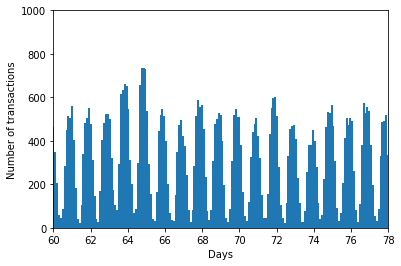

In [11]:
vals = plt.hist(train['TransactionDT'] / (3600*24), bins=1800)
plt.xlim(60, 78)
plt.xlabel('Days')
plt.ylabel('Number of transactions')
plt.ylim(0,1000)

Text(0,0.5,'Fraction of fraudulent transactions')

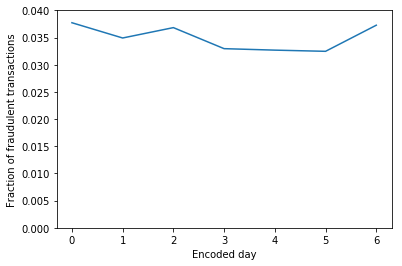

In [7]:
train['weekday'] = make_day_feature(train, offset=0.58)
plt.plot(train.groupby('weekday').mean()['isFraud'])

plt.ylim(0, 0.04)
plt.xlabel('Encoded day')
plt.ylabel('Fraction of fraudulent transactions')

Text(0,0.5,'Number of transactions')

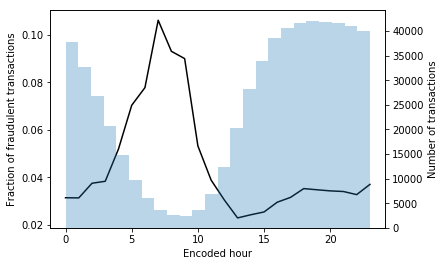

In [8]:
train['hours'] = make_hour_feature(train)
plt.plot(train.groupby('hours').mean()['isFraud'], color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')